<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dataset" data-toc-modified-id="Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#Feature-Extraction" data-toc-modified-id="Feature-Extraction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Feature Extraction</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Selection</a></span></li><li><span><a href="#Learning-Algorithm" data-toc-modified-id="Learning-Algorithm-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Learning Algorithm</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Evaluation</a></span></li><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Selection</a></span></li><li><span><a href="#Production-Pipeline" data-toc-modified-id="Production-Pipeline-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Production Pipeline</a></span></li></ul></div>

# Scikit-learn Machine Learning Pipeline

In [42]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

## Dataset

In [1]:
from sklearn import datasets

In [2]:
# fetch, load, make
data=datasets.load_iris()

In [3]:
data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
data=datasets.fetch_20newsgroups()

In [ ]:
len(data.data)

In [12]:
# regression data
datasets.make_regression()

(array([[ 1.4103821 ,  1.32893781,  0.47737667, ...,  0.25812503,
         -0.2168486 , -2.61470378],
        [ 0.38700205, -0.45425282, -1.89825323, ...,  0.14397403,
         -2.11773312, -2.37488387],
        [-3.11727943,  1.24461679, -0.03483767, ...,  0.382858  ,
          0.17089645,  1.669925  ],
        ...,
        [-1.52771881, -0.0774833 ,  1.1919392 , ...,  1.94902332,
         -0.87018518, -1.6475419 ],
        [-1.70772676,  1.05789479,  0.5751296 , ..., -0.58837025,
          0.28512644, -0.35712118],
        [-1.42076849,  1.28057666, -0.74249241, ..., -0.61388842,
         -0.03366216, -0.35460287]]),
 array([-240.26203   , -148.03352898,  148.4089049 ,   40.35792802,
         117.08576393, -204.76946475,  343.53564458, -276.32865035,
        -124.89702686,  -19.4251595 ,  -65.08243579,  -53.07652766,
          96.94939526, -156.51348681, -236.74057463, -316.65864165,
         -87.81055102,  142.54782566,  183.53726895,   33.92069904,
         -96.93585129, -232.67959

In [13]:
# classification data
X,y=datasets.make_blobs(random_state=42)

## Feature Extraction

In [14]:
from sklearn import feature_extraction

In [17]:
fe_dv=feature_extraction.DictVectorizer()

In [18]:
data = [
    {'today': 1, 'is': 1, 'good': 1, 'day': 1},
    {'tomorrow': 1, 'is': 1, 'good': 1, 'day': 1},
    {'yesterday': 1, 'is': 1, 'good': 1, 'day': 1}
]

In [19]:
data

[{'today': 1, 'is': 1, 'good': 1, 'day': 1},
 {'tomorrow': 1, 'is': 1, 'good': 1, 'day': 1},
 {'yesterday': 1, 'is': 1, 'good': 1, 'day': 1}]

In [21]:
fe_dv.fit(data)

DictVectorizer()

In [22]:
fe_dv.feature_names_

['day', 'good', 'is', 'today', 'tomorrow', 'yesterday']

In [23]:
fe_dv.vocabulary_

{'day': 0, 'good': 1, 'is': 2, 'today': 3, 'tomorrow': 4, 'yesterday': 5}

In [24]:
fe_dv.transform(data)

<3x6 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [25]:
fe_dv.transform(data).toarray()

array([[1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 0., 1., 0.],
       [1., 1., 1., 0., 0., 1.]])

In [34]:
fe_cv=feature_extraction.text.CountVectorizer(ngram_range=(2,2))    # 两个词算做一个feature   #

In [35]:
t1 = 'data scientist needs to learn statistics'
t2 = 'data scientist needs to learn computer science'
t3 = 'data scientist needs to learn business'
t4 = 'data scientist needs to know chemistry'

In [36]:
fe_cv.fit([t1,t2,t3,t4])

CountVectorizer(ngram_range=(2, 2))

In [37]:
fe_cv.transform([t1,t2,t3,t4])

<4x10 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [38]:
fe_cv.vocabulary_

{'data scientist': 1,
 'scientist needs': 7,
 'needs to': 6,
 'to learn': 9,
 'learn statistics': 5,
 'learn computer': 4,
 'computer science': 0,
 'learn business': 3,
 'to know': 8,
 'know chemistry': 2}

In [39]:
fe_cv.transform([t1,t2,t3,t4]).toarray()

array([[0, 1, 0, 0, 0, 1, 1, 1, 0, 1],
       [1, 1, 0, 0, 1, 0, 1, 1, 0, 1],
       [0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 1, 1, 0, 0, 0, 1, 1, 1, 0]])

## Feature Selection

In [40]:
# variance-based
# correlation-based

## model-based
## --partially
## --complete

In [47]:
from sklearn import feature_selection

In [55]:
# Feature selector that removes all low-variance features.
fs_vt=feature_selection.VarianceThreshold()

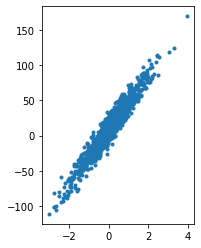

In [46]:
rgdata = datasets.make_regression(
    n_samples=1000, n_features=1, n_informative=1, 
    n_targets=1, bias=10.0, effective_rank=None, 
    tail_strength=0.5, noise=10.0, shuffle=True, 
    coef=True, random_state=1)
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.plot(rgdata[0][:,0], rgdata[1], '.');

In [48]:
rgdata[0]

array([[-1.06787658e+00],
       [-2.91594596e-01],
       [ 5.08077548e-02],
       [ 6.21803504e-01],
       [-5.45774168e-01],
       [ 1.55501599e+00],
       [-2.09752935e-01],
       [ 1.78975468e+00],
       [-7.67803746e-01],
       [ 1.47073986e+00],
       [-2.86384915e-01],
       [-3.64538050e-01],
       [ 4.03491642e-01],
       [ 3.37220938e-01],
       [ 8.64644065e-02],
       [-1.67419581e+00],
       [-9.24323185e-02],
       [ 5.20576337e-01],
       [ 1.46089238e+00],
       [-9.15424368e-01],
       [-1.61198320e-01],
       [ 1.57546791e+00],
       [ 7.44884536e-01],
       [ 1.04499441e+00],
       [-2.79099641e+00],
       [-7.47158294e-01],
       [-1.11711069e+00],
       [-1.09033833e+00],
       [ 8.59870972e-01],
       [ 1.90915485e-01],
       [-3.31283170e-01],
       [-4.23478297e-01],
       [ 3.19656942e-01],
       [-1.94504696e+00],
       [-8.80577600e-01],
       [ 8.38634747e-01],
       [-1.56450785e+00],
       [ 8.16043684e-01],
       [-7.3

In [49]:
rgdata[1]

array([-1.23380364e+01,  5.90624987e+00,  2.47312533e+01,  4.82485570e+01,
       -5.61981505e+00,  7.66177560e+01,  6.76483189e+00,  8.46128187e+01,
       -1.90796932e+01,  7.22356926e+01, -1.29699079e+01, -6.49630055e+00,
        1.27812552e+01,  2.89439981e+01,  1.44469881e+00, -4.00867884e+01,
        1.22915683e+01,  2.20114710e+01,  6.52024453e+01, -1.79662902e+01,
       -3.13228477e+00,  6.34175158e+01,  4.00098113e+01,  4.51120108e+01,
       -1.01596313e+02, -1.80505700e+01, -4.67661655e+01, -9.95001852e+00,
        3.32211860e+01,  1.62791990e+01,  9.86525164e-01,  1.55784938e+01,
        3.19160073e+01, -7.34032814e+01, -1.89206787e+01,  5.45554976e+01,
       -7.57656472e+01,  3.94093707e+01, -4.11018188e+00,  4.33295303e+01,
        1.59211767e+01, -8.88925301e+01, -2.70404182e+01, -7.65177799e+00,
       -9.21164876e+00,  2.42799991e+01, -3.30606838e+01,  5.71081830e+01,
        9.60251153e+01,  2.24467587e+00,  4.24152141e+01,  4.70104619e+01,
       -9.79454988e+00,  

In [53]:
np.hstack([rgdata[0],np.zeros(rgdata[0].shape)]).shape

(1000, 2)

In [56]:
Xnew=np.hstack([rgdata[0],np.zeros(rgdata[0].shape)])

In [57]:
fs_vt.fit_transform(Xnew)

array([[-1.06787658e+00],
       [-2.91594596e-01],
       [ 5.08077548e-02],
       [ 6.21803504e-01],
       [-5.45774168e-01],
       [ 1.55501599e+00],
       [-2.09752935e-01],
       [ 1.78975468e+00],
       [-7.67803746e-01],
       [ 1.47073986e+00],
       [-2.86384915e-01],
       [-3.64538050e-01],
       [ 4.03491642e-01],
       [ 3.37220938e-01],
       [ 8.64644065e-02],
       [-1.67419581e+00],
       [-9.24323185e-02],
       [ 5.20576337e-01],
       [ 1.46089238e+00],
       [-9.15424368e-01],
       [-1.61198320e-01],
       [ 1.57546791e+00],
       [ 7.44884536e-01],
       [ 1.04499441e+00],
       [-2.79099641e+00],
       [-7.47158294e-01],
       [-1.11711069e+00],
       [-1.09033833e+00],
       [ 8.59870972e-01],
       [ 1.90915485e-01],
       [-3.31283170e-01],
       [-4.23478297e-01],
       [ 3.19656942e-01],
       [-1.94504696e+00],
       [-8.80577600e-01],
       [ 8.38634747e-01],
       [-1.56450785e+00],
       [ 8.16043684e-01],
       [-7.3

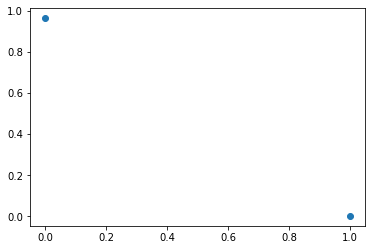

In [62]:
plt.scatter(range(2),Xnew.var(axis=0));

In [63]:
Xnew.var(axis=0)

array([0.96236911, 0.        ])

## Learning Algorithm

In [64]:
from sklearn import dummy

In [66]:
X,y=datasets.make_regression(n_samples=1000,random_state=42)

In [67]:
d_dr=dummy.DummyRegressor()

In [68]:
d_dr.fit(X,y)

DummyRegressor()

In [81]:
Ynew=pd.DataFrame(d_dr.predict(X))

In [78]:
pd.reset_option('all');


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



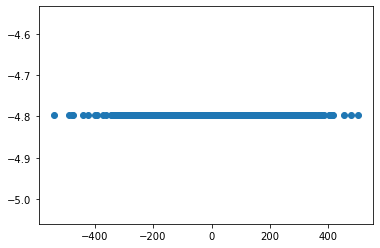

In [84]:
plt.scatter(y,Ynew);

In [85]:
from sklearn import linear_model

In [86]:
l_lr=linear_model.LinearRegression()

In [87]:
l_lr.fit(X,y)

LinearRegression()

In [88]:
ynew=l_lr.predict(X)

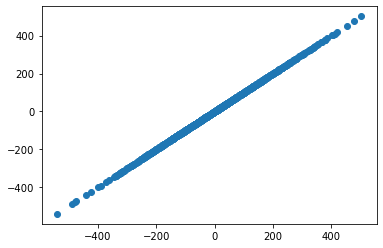

In [90]:
plt.scatter(y,ynew);

## Model Evaluation

In [91]:
from sklearn import metrics

In [92]:
metrics.mean_squared_error(y,ynew)

9.792716776819271e-26

In [93]:
metrics.r2_score(y,ynew)

1.0

## Model Selection

In [94]:
from sklearn import model_selection

In [95]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y)

In [97]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((750, 100), (250, 100), (750,), (250,))

In [98]:
l_lr.fit(X_train,y_train)

LinearRegression()

In [99]:
y2new=l_lr.predict(X_test)

In [101]:
metrics.mean_squared_error(y_test,y2new)

1.5824456988691042e-25

In [102]:
d_dr.fit(X_train,y_train)
y2new=d_dr.predict(X_test)
metrics.mean_squared_error(y_test,y2new)

24340.198883981222

In [104]:
model_selection.cross_val_score(l_lr,X,y)

array([1., 1., 1., 1., 1.])

In [105]:
model_selection.cross_val_score(d_dr,X,y)

array([-0.00106141, -0.00206165, -0.00383841, -0.00164196, -0.00291675])

## Production Pipeline

In [106]:
from sklearn import pipeline